In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import ShuffleSplit

from catboost import CatBoostRegressor
from catboost import Pool

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры Ектб_2/Выборка_ектб.xlsx', sheet_name = 0)
df

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Цена(кв.м),Выбросы,Выбросы_1,Исп,...,Нежилые помещения на первом этаже,строение,Квартира угловая / торцевая,Способ продажи,Отделка,Название новостройки,"Корпус, строение",Тип участия,Срок сдачи,Запланирован снос
0,1_этажи,0,этажи,15.761421,7000000,7200000,99573.257468,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2_этажи,0,этажи,16.231424,11200000,11400000,143589.743590,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3_этажи,0,этажи,15.274126,4300000,4500000,106435.643564,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4_этажи,0,этажи,15.555977,5700000,6000000,187500.000000,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5_этажи,0,этажи,14.557448,2100000,2200000,91304.347826,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13327,8462_авито,0,авито,15.250571,4199900,0,126503.012048,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,Квартал «Олимпика»,Дом 12.5,другое,Сдан 4 кв. 2022,NaN
13328,8463_авито,0,авито,15.384126,4800000,0,166089.965398,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,ЖК «Космос»,Дом 2 (Кассиопея),другое,Сдан 3 кв. 2023,NaN
13329,8464_авито,0,авито,15.293700,4385000,0,141451.612903,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,ЖК «Миллениум»,"Дом 5 (секц. А, Б)",другое,Сдан 2 кв. 2017,NaN
13330,8465_авито,1,авито,15.332833,4560000,0,106046.511628,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,ЖК «River Park»,NaN,другое,Сдан 4 кв. 2023,NaN


In [3]:
df = df[df['Мусор'] == 0]
df = df[df['dup_res'] == 0]
df = df[df['Выбросы'] == 0]
#df = df[df['LN(Цена)'] <= 17.5]
df.reset_index(drop = True, inplace = True)
df

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Цена(кв.м),Выбросы,Выбросы_1,Исп,...,Нежилые помещения на первом этаже,строение,Квартира угловая / торцевая,Способ продажи,Отделка,Название новостройки,"Корпус, строение",Тип участия,Срок сдачи,Запланирован снос
0,1_этажи,0,этажи,15.761421,7000000,7200000,99573.257468,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3_этажи,0,этажи,15.274126,4300000,4500000,106435.643564,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6_этажи,0,этажи,15.483217,5300000,0,124941.065535,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7_этажи,0,этажи,15.679591,6450000,6490000,113556.338028,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15_этажи,0,этажи,15.823725,7450000,7500000,168552.036199,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,8460_авито,0,авито,16.587599,15992000,0,172699.784017,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,Компаунд «Проспект Мира»,"Дом 2 (11.2А, 11.2Б)",другое,Сдан 1 кв. 2021,NaN
8021,8461_авито,0,авито,15.657202,6307200,0,96000.000000,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,ЖК «Симфония»,"4 этап (Секции 4.1, 4.2, 5)",другое,Сдан 4 кв. 2023,NaN
8022,8462_авито,0,авито,15.250571,4199900,0,126503.012048,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,Квартал «Олимпика»,Дом 12.5,другое,Сдан 4 кв. 2022,NaN
8023,8463_авито,0,авито,15.384126,4800000,0,166089.965398,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,ЖК «Космос»,Дом 2 (Кассиопея),другое,Сдан 3 кв. 2023,NaN


In [4]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Этаж_4']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Цена(кв.м),Выбросы,Выбросы_1,Исп,...,Тип участия,Срок сдачи,Запланирован снос,Этаж_4_более_25,Этаж_4_неважно,Этаж_4_первый,Этаж_4_последний,Этаж_4_этажи_11-25,Этаж_4_этажи_2-5,Этаж_4_этажи_6-10
0,1_этажи,0,этажи,15.761421,7000000,7200000,99573.257468,0,0,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3_этажи,0,этажи,15.274126,4300000,4500000,106435.643564,0,0,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,6_этажи,0,этажи,15.483217,5300000,0,124941.065535,0,0,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,7_этажи,0,этажи,15.679591,6450000,6490000,113556.338028,0,0,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,15_этажи,0,этажи,15.823725,7450000,7500000,168552.036199,0,0,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,8460_авито,0,авито,16.587599,15992000,0,172699.784017,0,0,NaN,...,другое,Сдан 1 кв. 2021,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8021,8461_авито,0,авито,15.657202,6307200,0,96000.000000,0,0,NaN,...,другое,Сдан 4 кв. 2023,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8022,8462_авито,0,авито,15.250571,4199900,0,126503.012048,0,0,NaN,...,другое,Сдан 4 кв. 2022,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8023,8463_авито,0,авито,15.384126,4800000,0,166089.965398,0,0,NaN,...,другое,Сдан 3 кв. 2023,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Ремонт_1']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Цена(кв.м),Выбросы,Выбросы_1,Исп,...,Этаж_4_последний,Этаж_4_этажи_11-25,Этаж_4_этажи_2-5,Этаж_4_этажи_6-10,Ремонт_1_без_отделки,Ремонт_1_премиальный,Ремонт_1_премиальный+,Ремонт_1_стандартный,Ремонт_1_требует_косметического_ремонта,Ремонт_1_улучшенный
0,1_этажи,0,этажи,15.761421,7000000,7200000,99573.257468,0,0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3_этажи,0,этажи,15.274126,4300000,4500000,106435.643564,0,0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,6_этажи,0,этажи,15.483217,5300000,0,124941.065535,0,0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,7_этажи,0,этажи,15.679591,6450000,6490000,113556.338028,0,0,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,15_этажи,0,этажи,15.823725,7450000,7500000,168552.036199,0,0,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,8460_авито,0,авито,16.587599,15992000,0,172699.784017,0,0,NaN,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8021,8461_авито,0,авито,15.657202,6307200,0,96000.000000,0,0,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8022,8462_авито,0,авито,15.250571,4199900,0,126503.012048,0,0,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8023,8463_авито,0,авито,15.384126,4800000,0,166089.965398,0,0,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Раст_метро_2']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Цена(кв.м),Выбросы,Выбросы_1,Исп,...,Этаж_4_этажи_6-10,Ремонт_1_без_отделки,Ремонт_1_премиальный,Ремонт_1_премиальный+,Ремонт_1_стандартный,Ремонт_1_требует_косметического_ремонта,Ремонт_1_улучшенный,Раст_метро_2_на_удалении,Раст_метро_2_неважно,Раст_метро_2_рядом
0,1_этажи,0,этажи,15.761421,7000000,7200000,99573.257468,0,0,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3_этажи,0,этажи,15.274126,4300000,4500000,106435.643564,0,0,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,6_этажи,0,этажи,15.483217,5300000,0,124941.065535,0,0,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,7_этажи,0,этажи,15.679591,6450000,6490000,113556.338028,0,0,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,15_этажи,0,этажи,15.823725,7450000,7500000,168552.036199,0,0,NaN,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,8460_авито,0,авито,16.587599,15992000,0,172699.784017,0,0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8021,8461_авито,0,авито,15.657202,6307200,0,96000.000000,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8022,8462_авито,0,авито,15.250571,4199900,0,126503.012048,0,0,NaN,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8023,8463_авито,0,авито,15.384126,4800000,0,166089.965398,0,0,NaN,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [7]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Районы_2']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Цена(кв.м),Выбросы,Выбросы_1,Исп,...,Районы_2_Уктус,Районы_2_Уралмаш,Районы_2_Химмаш,Районы_2_Центр,Районы_2_Центральный,Районы_2_Шарташ_Калиновский_Изоплит,Районы_2_Шарташский_рынок_Сибирский,Районы_2_Эльмаш,Районы_2_Юго_Западный,Районы_2_Южный
0,1_этажи,0,этажи,15.761421,7000000,7200000,99573.257468,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3_этажи,0,этажи,15.274126,4300000,4500000,106435.643564,0,0,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,6_этажи,0,этажи,15.483217,5300000,0,124941.065535,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7_этажи,0,этажи,15.679591,6450000,6490000,113556.338028,0,0,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15_этажи,0,этажи,15.823725,7450000,7500000,168552.036199,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,8460_авито,0,авито,16.587599,15992000,0,172699.784017,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8021,8461_авито,0,авито,15.657202,6307200,0,96000.000000,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8022,8462_авито,0,авито,15.250571,4199900,0,126503.012048,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8023,8463_авито,0,авито,15.384126,4800000,0,166089.965398,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['ЖК_БД']]).toarray())

enc_df.columns = enc.get_feature_names_out() #см ниже
#enc_df
df = df.join(enc_df)
df

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Цена(кв.м),Выбросы,Выбросы_1,Исп,...,Районы_2_Центр,Районы_2_Центральный,Районы_2_Шарташ_Калиновский_Изоплит,Районы_2_Шарташский_рынок_Сибирский,Районы_2_Эльмаш,Районы_2_Юго_Западный,Районы_2_Южный,ЖК_БД_нет,ЖК_БД_престижный,ЖК_БД_престижный+
0,1_этажи,0,этажи,15.761421,7000000,7200000,99573.257468,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3_этажи,0,этажи,15.274126,4300000,4500000,106435.643564,0,0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,6_этажи,0,этажи,15.483217,5300000,0,124941.065535,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,7_этажи,0,этажи,15.679591,6450000,6490000,113556.338028,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,15_этажи,0,этажи,15.823725,7450000,7500000,168552.036199,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,8460_авито,0,авито,16.587599,15992000,0,172699.784017,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8021,8461_авито,0,авито,15.657202,6307200,0,96000.000000,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8022,8462_авито,0,авито,15.250571,4199900,0,126503.012048,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8023,8463_авито,0,авито,15.384126,4800000,0,166089.965398,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#df['Многоуровневая_En'] = encoder.fit_transform(df[['Многоуровневая']])
#df['Терраса_En'] = encoder.fit_transform(df[['Терраса']])
#df['Витрины_En'] = encoder.fit_transform(df[['Витрины']])
#df['ЖК_En'] = encoder.fit_transform(df[['ЖК']])
df['Вид_1_En'] = encoder.fit_transform(df[['Вид_1']])
#df['Вид_зр_En'] = encoder.fit_transform(df[['Вид_зр']])
df

C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Цена(кв.м),Выбросы,Выбросы_1,Исп,...,Районы_2_Центральный,Районы_2_Шарташ_Калиновский_Изоплит,Районы_2_Шарташский_рынок_Сибирский,Районы_2_Эльмаш,Районы_2_Юго_Западный,Районы_2_Южный,ЖК_БД_нет,ЖК_БД_престижный,ЖК_БД_престижный+,Вид_1_En
0,1_этажи,0,этажи,15.761421,7000000,7200000,99573.257468,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,3_этажи,0,этажи,15.274126,4300000,4500000,106435.643564,0,0,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,6_этажи,0,этажи,15.483217,5300000,0,124941.065535,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,7_этажи,0,этажи,15.679591,6450000,6490000,113556.338028,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,15_этажи,0,этажи,15.823725,7450000,7500000,168552.036199,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,8460_авито,0,авито,16.587599,15992000,0,172699.784017,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
8021,8461_авито,0,авито,15.657202,6307200,0,96000.000000,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
8022,8462_авито,0,авито,15.250571,4199900,0,126503.012048,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
8023,8463_авито,0,авито,15.384126,4800000,0,166089.965398,0,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [10]:
list(df.columns)

['ID',
 'Мусор',
 'Агрегатор',
 'LN(Цена)',
 'Цена',
 'Цена_перв',
 'Цена(кв.м)',
 'Выбросы',
 'Выбросы_1',
 'Исп',
 'Комм',
 'Выбросы_2',
 'Исп.1',
 'Комм.1',
 'IsolationForest',
 'pca',
 'COPOD',
 'dup_all',
 'dup_1',
 'dup_2',
 'Пересечения',
 'dup(<=0.03)',
 'Пересечения(<=0.03)',
 'Пересечения(>0.03)',
 'dup_res',
 'ОПлощадь',
 'Оплощадь_перв',
 'Комнатность',
 'Комнатность_перв',
 'Этаж_1',
 'Этаж_2',
 'Этаж_3',
 'Этаж_4',
 'Этаж/Этажность',
 'Этажность_1',
 'Этажность_2',
 'Неточности',
 'Переменная этажность',
 'Р',
 'Р%',
 'Минжкх',
 'П',
 'Правдом',
 'П.1',
 'Этажность_перв',
 'ГП',
 'Неточности.1',
 'Р.1',
 'Минжкх.1',
 'Правдом.1',
 'Год постройки',
 'Аварийные',
 'Исп.2',
 'Ремонт_1',
 'Ремонт_перв',
 'Санузел',
 'Стены_1',
 'Стены_перв',
 'Адрес_перв',
 'Адрес',
 'Проверка номера дома',
 'Дом',
 'Дом_Ya',
 'Проверка',
 'Адрес_yandex',
 'Долгота',
 'Широта',
 'Сцепка_к',
 'Сцепка_3',
 'Сцепка_4',
 'Дата',
 'Просмотры',
 'Раст_центр_1',
 'Раст_центр_2',
 'Раст_метро_1',
 'Р

In [12]:
X = df[[
         'ОПлощадь',
         'Этажность_1',
         'ГП',
         'Раст_центр_1',
         'Этаж_4_более_25',
         'Этаж_4_неважно',
         'Этаж_4_первый',
         'Этаж_4_последний',
         'Этаж_4_этажи_11-25',
         'Этаж_4_этажи_2-5',
         'Этаж_4_этажи_6-10',
         'Ремонт_1_без_отделки',
         'Ремонт_1_премиальный',
         'Ремонт_1_премиальный+',
         'Ремонт_1_стандартный',
         'Ремонт_1_требует_косметического_ремонта',
         'Ремонт_1_улучшенный',
         'Раст_метро_2_на_удалении',
         'Раст_метро_2_неважно',
         'Раст_метро_2_рядом',
         'Районы_2_Академический',
         'Районы_2_Ботанический',
         'Районы_2_ВИЗ_Большеконный',
         'Районы_2_Вокзальный',
         'Районы_2_Волгоградский',
         'Районы_2_Вторчермет_УНЦ_Совхозный',
         'Районы_2_Втузгородок_Первомайский',
         'Районы_2_Елизавет_Рудный_Нижнеисетский',
         'Районы_2_Заречный',
         'Районы_2_Звездочка_Завокзальный',
         'Районы_2_Зеленая_Роща',
         'Районы_2_Зеленая_горка',
         'Районы_2_Клевер_Парк',
         'Районы_2_Кольцово_Новокольцовский',
         'Районы_2_Компрессорный_Лечебный_Птицефабрика',
         'Районы_2_Комсомольский',
         'Районы_2_Космонавтов',
         'Районы_2_Новая_сортировка',
         'Районы_2_Парковой',
         'Районы_2_Пионерский',
         'Районы_2_Синие_Камни',
         'Районы_2_Солнечный',
         'Районы_2_Старая_сортировка',
         'Районы_2_Уктус',
         'Районы_2_Уралмаш',
         'Районы_2_Химмаш',
         'Районы_2_Центр',
         'Районы_2_Центральный',
         'Районы_2_Шарташ_Калиновский_Изоплит',
         'Районы_2_Шарташский_рынок_Сибирский',
         'Районы_2_Эльмаш',
         'Районы_2_Юго_Западный',
         'Районы_2_Южный',
         'ЖК_БД_нет',
         'ЖК_БД_престижный',
         'ЖК_БД_престижный+',
         'Многоуровневость',
         'Терраса',
         'Вид_1_En'
      ]]

Y = df['LN(Цена)']

In [13]:
catb = CatBoostRegressor(iterations = 3500, #максимальное количество построенных деревьев
                         random_seed = 6, 
                         learning_rate = 0.03, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 4, #глубина дерева
                         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
                         #l2_leaf_reg = 20, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         one_hot_max_size = 35, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         #eval_metric = 'MAPE', #MAPE
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 20
                        ) #делай остановку через 20 итераций

In [ ]:
shuffle_split = ShuffleSplit(n_splits = 5, test_size = 0.05, random_state = 0)

train_sizes, train_scores, test_scores = learning_curve(
                                                        catb,
                                                        X, 
                                                        Y,
                                                        cv = shuffle_split,
                                                        scoring = 'neg_root_mean_squared_error',
                                                        train_sizes = np.linspace(0.05, 0.95, 20, endpoint = True),
                                                        #train_sizes = np.linspace(0.05, 0.95, 20) * 7586,
                                                        #train_sizes = [0.05, 0.1, 0.15, 0.2, 0.25, 
                                                        #               0.3, 0.35, 0.4, 0.45, 0.50, 
                                                        #               0.55, 0.6, 0.65, 0.7, 0.75, 
                                                        #               0.8, 0.85, 0.9, 0.95],
                                                        #verbose = 1
                                                        )
#максимальный train_sizes будет зависить от cv, где устанавливается фиксированный размер testa, сейчас он = 10%
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

# plt.figure(figsize = (13, 7))
# plt.plot(train_sizes, train_mean, '--', color = "#111111",
#          label = "Тренировочная оценка")
# plt.plot(train_sizes, test_mean, color = "#111111",
#          label = "Перекрестно-проверочная оценка")

# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = "#DDDDDD")
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color = "#DDDDDD")

# plt.title("Кривая обучения")
# plt.xlabel("Размер тренировочного набора")
# plt.ylabel("Оценка точности")
# plt.legend(loc = "best")
# plt.tight_layout()
# plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

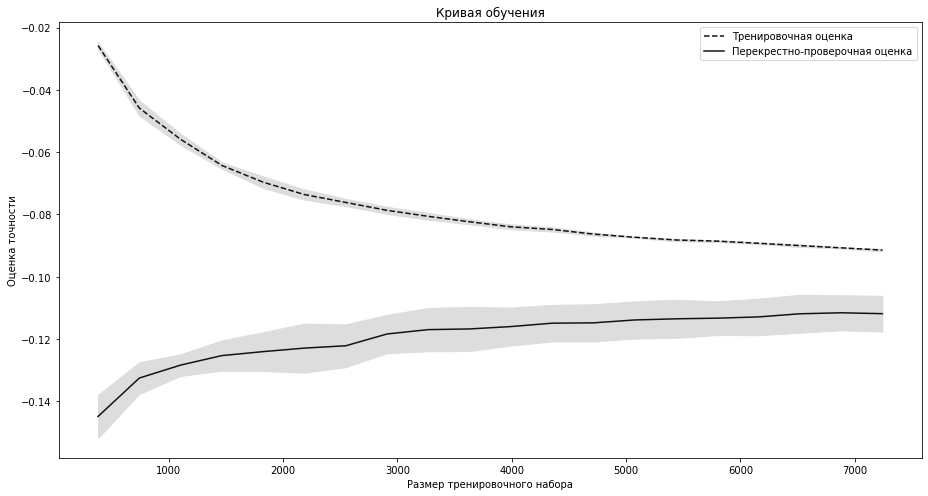

In [15]:
plt.figure(figsize = (13, 7))
plt.plot(train_sizes, train_mean, '--', color = "#111111",
         label = "Тренировочная оценка")
plt.plot(train_sizes, test_mean, color = "#111111",
         label = "Перекрестно-проверочная оценка")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = "#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color = "#DDDDDD")

plt.title("Кривая обучения")
plt.xlabel("Размер тренировочного набора")
plt.ylabel("Оценка точности")
plt.legend(loc = "best")
plt.tight_layout()
plt.show

In [14]:
train_sizes

array([ 214,  418,  621,  824, 1028, 1231, 1434, 1638, 1841, 2044, 2248,
       2451, 2654, 2858, 3061, 3264, 3468, 3671, 3874, 4078])

In [15]:
train_scores

array([[-0.01049019, -0.01105923, -0.01012147, -0.00772165, -0.00941451],
       [-0.02387291, -0.02353248, -0.02868674, -0.0280685 , -0.02772395],
       [-0.03502208, -0.03746261, -0.03870525, -0.04042394, -0.03769488],
       [-0.04337707, -0.04431814, -0.04586323, -0.04764792, -0.04393916],
       [-0.05058021, -0.05083296, -0.0520664 , -0.05051163, -0.04897999],
       [-0.05394528, -0.05720484, -0.05487992, -0.05519074, -0.05537753],
       [-0.0591414 , -0.06126041, -0.05746859, -0.0593317 , -0.05826208],
       [-0.06191355, -0.0657391 , -0.062566  , -0.06252888, -0.06112656],
       [-0.06570804, -0.0676853 , -0.06519434, -0.06457662, -0.06398429],
       [-0.06745015, -0.06963627, -0.06764636, -0.06672456, -0.06633315],
       [-0.06906407, -0.07038069, -0.06829418, -0.06808194, -0.06841324],
       [-0.07137596, -0.07106518, -0.07044008, -0.06970577, -0.06989566],
       [-0.07254975, -0.07273991, -0.07183619, -0.07163457, -0.07233241],
       [-0.07380172, -0.07365654, -0.0

In [16]:
test_scores

array([[-0.14217328, -0.14523125, -0.14539612, -0.15132444, -0.19362773],
       [-0.12947819, -0.13539651, -0.13529042, -0.13104501, -0.14881592],
       [-0.11788427, -0.12177119, -0.13782038, -0.1256628 , -0.14922678],
       [-0.11423274, -0.12400683, -0.12750553, -0.12229452, -0.12844499],
       [-0.11176239, -0.12533575, -0.12438282, -0.12144856, -0.12523467],
       [-0.10992963, -0.11858914, -0.12402018, -0.11515617, -0.12043265],
       [-0.10875421, -0.11417088, -0.12351291, -0.11390155, -0.1184878 ],
       [-0.10566132, -0.11241958, -0.11754981, -0.1105741 , -0.12182292],
       [-0.10316893, -0.11206587, -0.11475662, -0.10992104, -0.11770628],
       [-0.10379371, -0.11120284, -0.11544962, -0.10531096, -0.11570591],
       [-0.100607  , -0.10979114, -0.11188565, -0.10599839, -0.11311786],
       [-0.09772545, -0.11113481, -0.10794489, -0.10287258, -0.11292486],
       [-0.09591284, -0.10798656, -0.10956466, -0.10264593, -0.11162246],
       [-0.0973148 , -0.10615563, -0.1

In [17]:
train_sizes = np.linspace(0.05, 0.95, 20) * 7586
train_sizes

array([ 379.3       ,  738.63684211, 1097.97368421, 1457.31052632,
       1816.64736842, 2175.98421053, 2535.32105263, 2894.65789474,
       3253.99473684, 3613.33157895, 3972.66842105, 4332.00526316,
       4691.34210526, 5050.67894737, 5410.01578947, 5769.35263158,
       6128.68947368, 6488.02631579, 6847.36315789, 7206.7       ])

<function matplotlib.pyplot.show(close=None, block=None)>

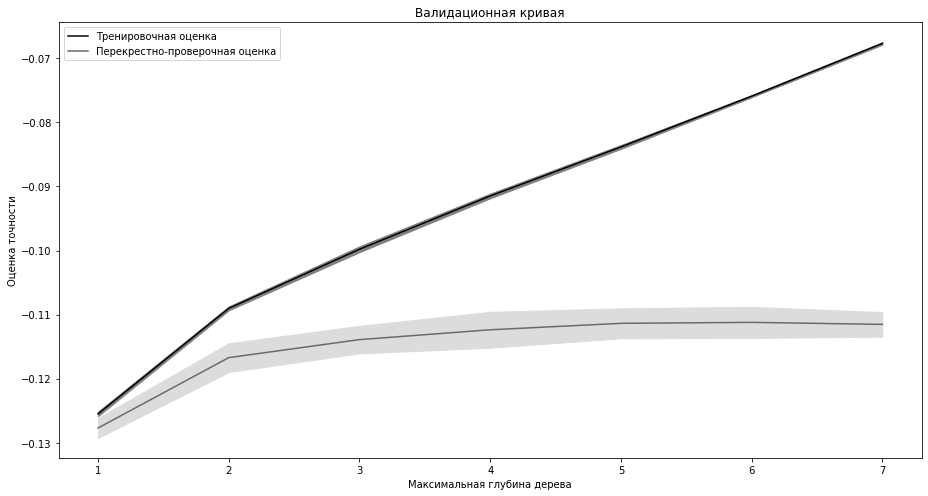

In [16]:
shuffle_split = ShuffleSplit(n_splits = 5, test_size = 0.10, random_state = 0)
param_range = np.arange(1, 8, 1)

train_scores, test_scores = validation_curve(
                                             catb,
                                             X, 
                                             Y,
                                             cv = shuffle_split,
                                             scoring = 'neg_root_mean_squared_error',
                                             param_name = "max_depth",
                                             param_range = param_range,
                                             n_jobs = -1,
                                             #verbose = 1
                                            )

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.figure(figsize = (13, 7))
plt.plot(param_range, train_mean, color = "black",
         label = "Тренировочная оценка")
plt.plot(param_range, test_mean, color = "dimgrey",
         label = "Перекрестно-проверочная оценка")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color = "gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color = "gainsboro")

plt.title("Валидационная кривая")
plt.xlabel("Максимальная глубина дерева")
plt.ylabel("Оценка точности")
plt.legend(loc = "best")
plt.tight_layout()
plt.show